# Process the Landslide in Greenland with the Discrete Fourier Transform




In [1]:
# import some standard libraries
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

print ("sys.version=",sys.version)

sys.version= 3.5.4 | packaged by conda-forge | (default, Dec 18 2017, 06:40:48) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]


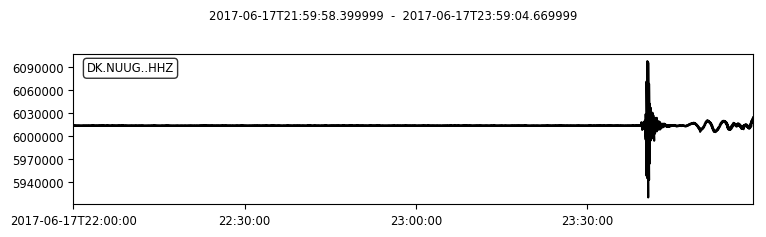

In [2]:
import obspy
import obspy.clients.fdsn
client = obspy.clients.fdsn.Client("GFZ")
t = obspy.UTCDateTime("2017-06-17_22:00:00")
st = client.get_waveforms("DK", "NUUG", "*", "HHZ", t, t + 2*60*60)
st.plot()

dknuug0.size= 714628
Fs= 100.0


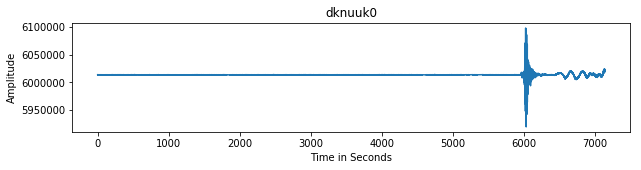

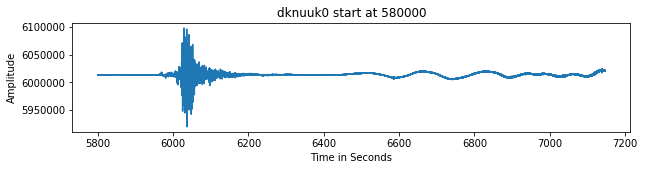

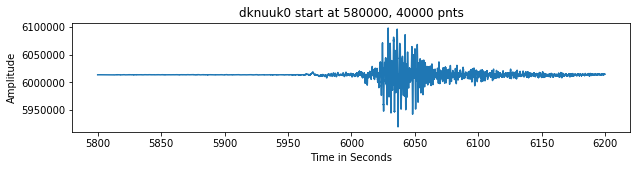

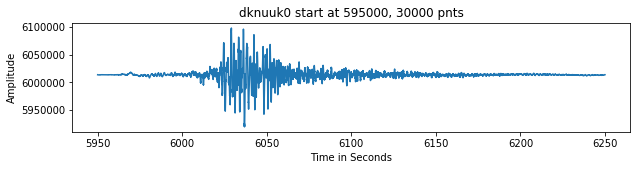

In [3]:
# convert data to numpy array.  make some plots to zoom on the event
dknuug0 = st.traces[0].data
print('dknuug0.size=',dknuug0.size)

Fs = st.traces[0].meta.sampling_rate  # Sample rate in Hz
print ('Fs=',Fs)
deltat=1.0/Fs
time=np.arange(0.0,deltat*dknuug0.size,deltat)

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')

plt.title('dknuuk0')
plt.plot(time,dknuug0)
plt.show()

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('dknuuk0 start at 580000')
plt.xlabel=('Time in Seconds')
plt.plot(time[580000:],dknuug0[580000:])
plt.show()

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('dknuuk0 start at 580000, 40000 pnts')
plt.plot(time[580000:580000+40000],dknuug0[580000:580000+40000])
plt.show()

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('dknuuk0 start at 595000, 30000 pnts')
plt.plot(time[595000:595000+30000],dknuug0[595000:595000+30000])
plt.show()



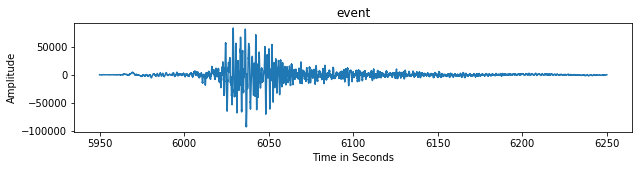

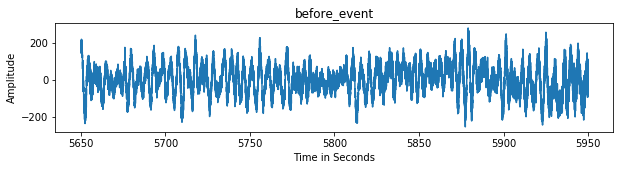

In [4]:
# get two window.  One with event and one before event
event=dknuug0[595000:595000+30000]
time_event=time[595000:595000+30000]
event=event-np.average(event)
#-np.sqrt(np.dot(event,event))
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('event')
plt.plot(time_event,event)
plt.show()

before_event=dknuug0[565000:565000+30000]
before_event=before_event-np.average(before_event)
time_before_event=time[565000:565000+30000]
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('before_event')
plt.plot(time_before_event,before_event)
plt.show()




In [5]:
frequencies=np.fft.rfftfreq(event.size,d=deltat)

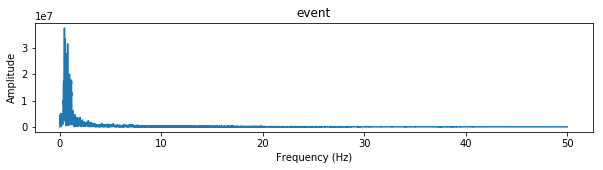

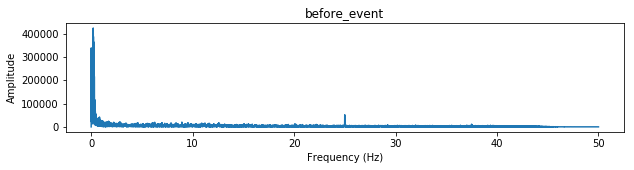

In [6]:
EVENT=np.fft.rfft(event)
#plt.plot(np.absolute(EVENT))
#plt.show()
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('event')
plt.plot(frequencies,np.absolute(EVENT))
plt.show()

BEFORE_EVENT=np.fft.rfft(before_event)
#plt.plot(np.absolute(BEFORE_EVENT))
#plt.show()
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('before_event')
plt.plot(frequencies,np.absolute(BEFORE_EVENT))
plt.show()


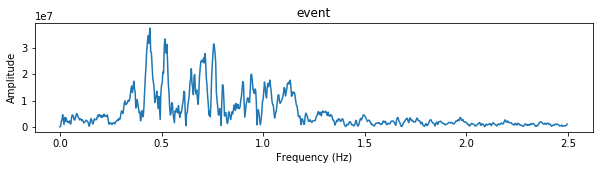

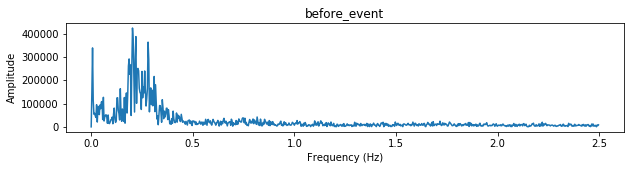

In [7]:
EVENT=np.fft.rfft(event)
#plt.plot(np.absolute(EVENT))
#plt.show()
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('event')
plt.plot(frequencies[:750],np.absolute(EVENT[:750]))
plt.show()

BEFORE_EVENT=np.fft.rfft(before_event)
#plt.plot(np.absolute(BEFORE_EVENT))
#plt.show()
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('before_event')
plt.plot(frequencies[:750],np.absolute(BEFORE_EVENT[:750]))
plt.show()



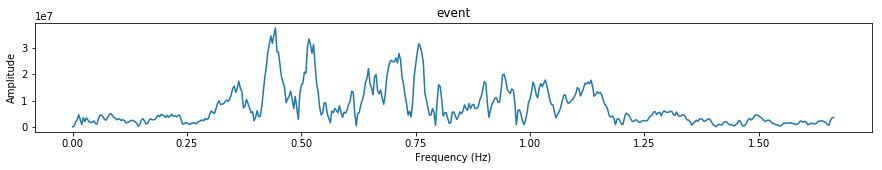

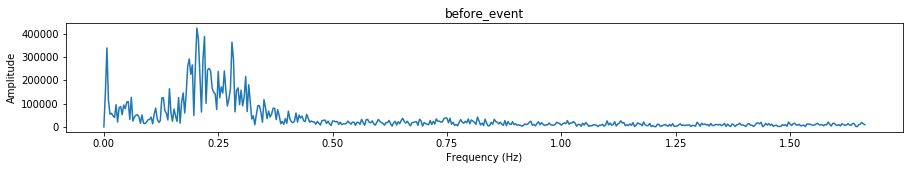

In [8]:
EVENT=np.fft.rfft(event)
#plt.plot(np.absolute(EVENT))
#plt.show()
fig, ax = plt.subplots(figsize=(15, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('event')
plt.plot(frequencies[:500],np.absolute(EVENT[:500]))
plt.show()

BEFORE_EVENT=np.fft.rfft(before_event)
#plt.plot(np.absolute(BEFORE_EVENT))
#plt.show()
fig, ax = plt.subplots(figsize=(15, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('before_event')
plt.plot(frequencies[:500],np.absolute(BEFORE_EVENT[:500]))
plt.show()




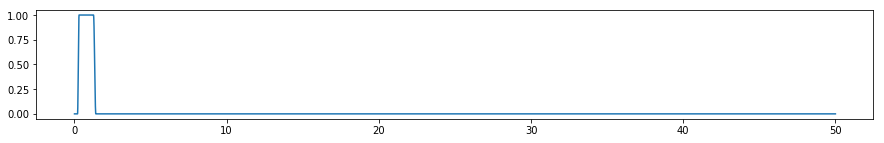

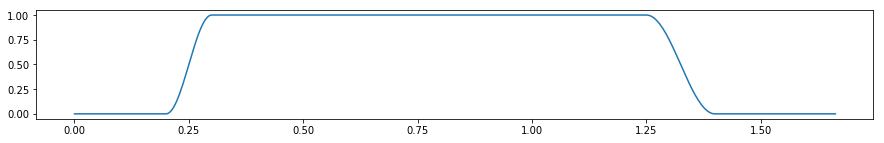

In [9]:
ramp_freq=np.array([.0,.2,.3,1.25,1.4,50])
ramp_amp =np.array([.0,.0,1.0,1.0, .0,.0])
ramp=np.square(np.cos(np.pi/2.0*(1.0-np.interp(frequencies,ramp_freq,ramp_amp))))
fig, ax = plt.subplots(figsize=(15, 2))
plt.plot(frequencies,ramp)
plt.show()
fig, ax = plt.subplots(figsize=(15, 2))
plt.plot(frequencies[:500],ramp[:500])
plt.show()

In [10]:
EVENT_FILTERRED=ramp*EVENT
BEFORE_EVENT_FILTERRED=ramp*BEFORE_EVENT

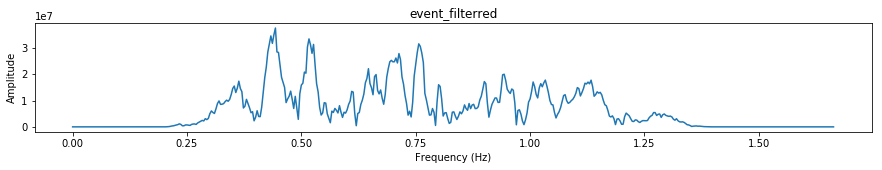

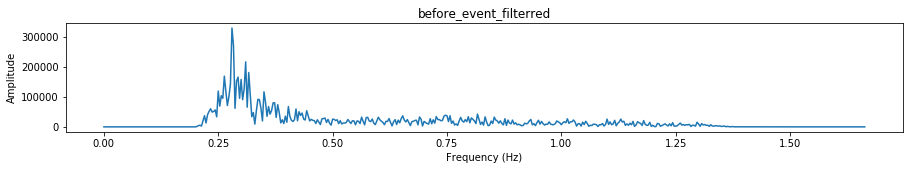

In [11]:

fig, ax = plt.subplots(figsize=(15, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('event_filterred')
plt.plot(frequencies[:500],np.absolute(EVENT_FILTERRED[:500]))
plt.show()

fig, ax = plt.subplots(figsize=(15, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('before_event_filterred')
plt.plot(frequencies[:500],np.absolute(BEFORE_EVENT_FILTERRED[:500]))
plt.show()



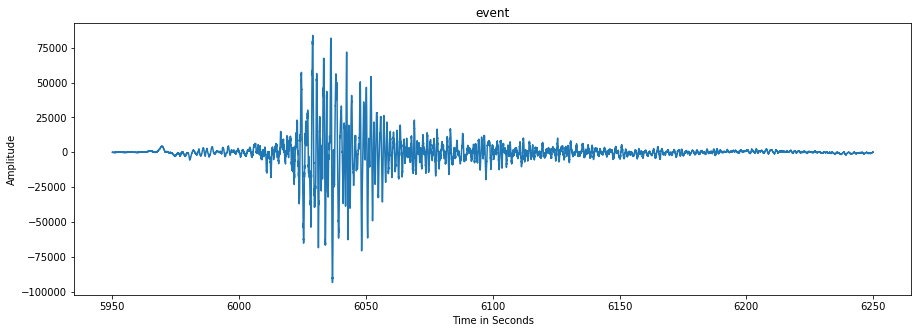

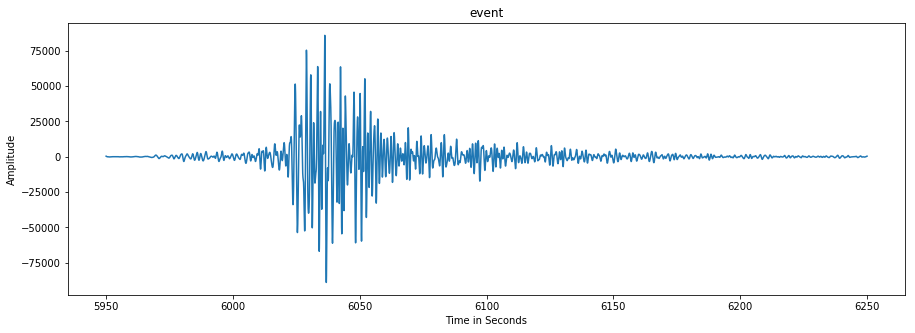

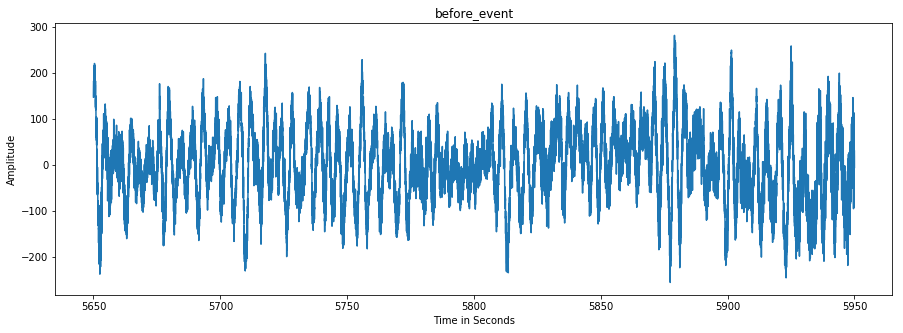

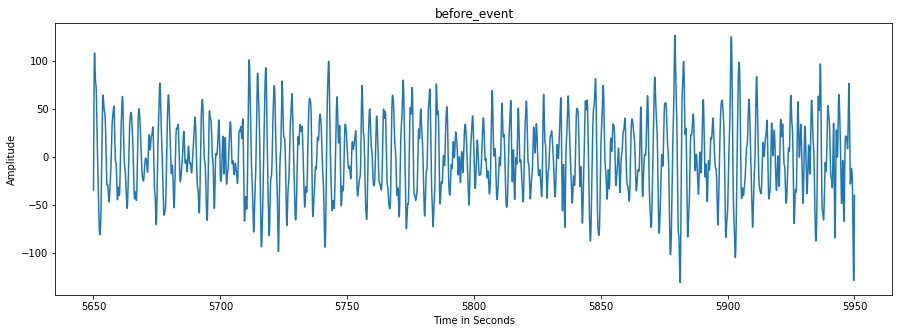

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('event')
plt.plot(time_event,event)
plt.show()

event_filterred=np.fft.irfft(EVENT_FILTERRED)
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('event')
plt.plot(time_event,event_filterred)
plt.show()





fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('before_event')
plt.plot(time_before_event,before_event)
plt.show()

before_event_filterred=np.fft.irfft(BEFORE_EVENT_FILTERRED)
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('before_event')
plt.plot(time_before_event,before_event_filterred)
plt.show()


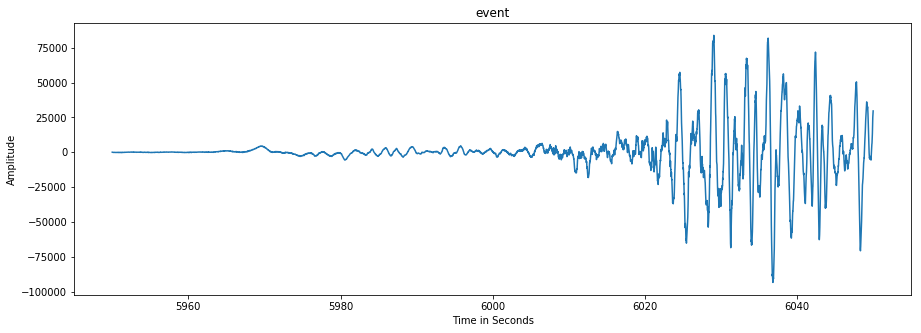

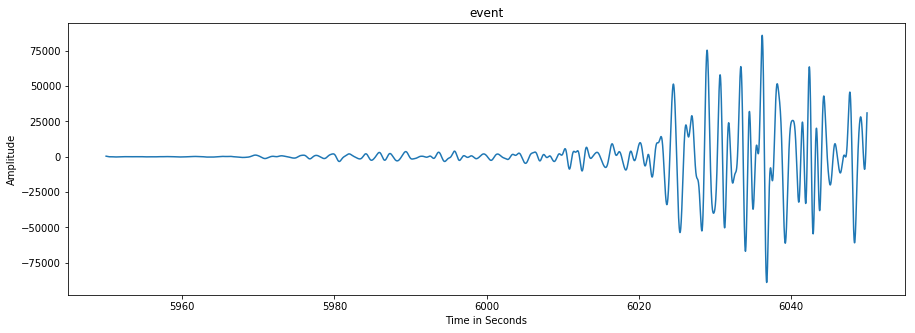

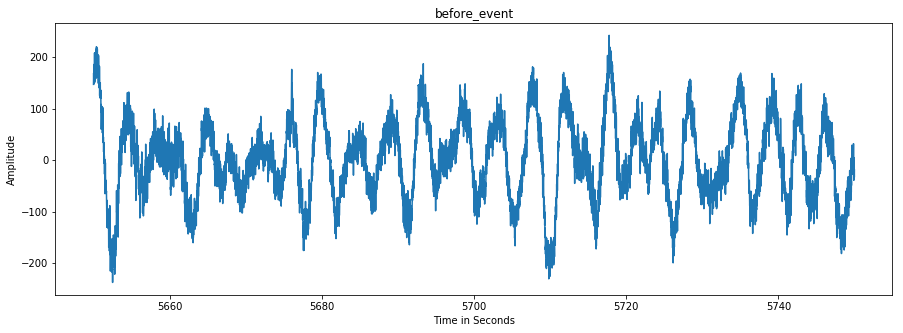

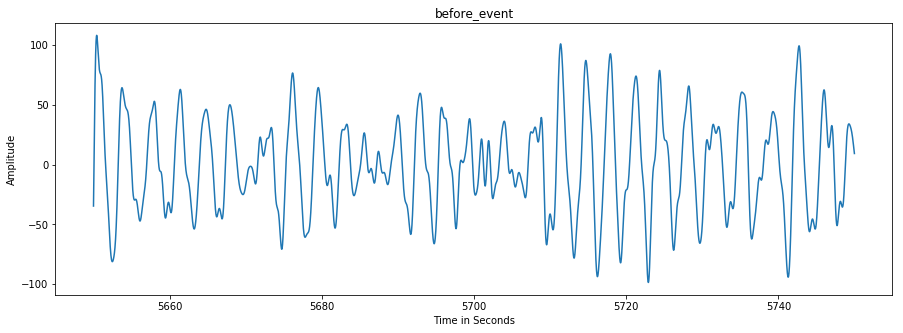

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('event')
plt.plot(time_event[:10000],event[:10000])
plt.show()

event_filterred=np.fft.irfft(EVENT_FILTERRED)
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('event')
plt.plot(time_event[:10000],event_filterred[:10000])
plt.show()





fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('before_event')
plt.plot(time_before_event[:10000],before_event[:10000])
plt.show()

before_event_filterred=np.fft.irfft(BEFORE_EVENT_FILTERRED)
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('before_event')
plt.plot(time_before_event[:10000],before_event_filterred[:10000])
plt.show()



In [14]:
np.fft.rfft??

In [15]:
np.mgrid?